####Name-Raj Bahadur Singh
####Section - F
####Roll No- 44
####Uni.Roll No- 2215001402

# Project- Regression Of Used Car Prices
###Task: To develop a model that can be used to predict the price of used cars based on various attributes.

###Dataset: Training Dataset (train.csv): Contains features along with the target variable,price is the continuous target.Test Dataset (test.csv): Contains the features but requires predictions the value of price for each row.

###Evaluation: The performance of the model is evaluated using the Root Mean Squared Error (RMSE),

In [190]:
#importing important libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [191]:
# Load up the train and test datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [192]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [193]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [194]:
df_train.shape,df_test.shape

((188533, 13), (125690, 12))

In [195]:
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [196]:
df_test.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


In [197]:
# Drop the 'id' column from the datasets
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         125690 non-null  object
 1   model         125690 non-null  object
 2   model_year    125690 non-null  int64 
 3   milage        125690 non-null  int64 
 4   fuel_type     122307 non-null  object
 5   engine        125690 non-null  object
 6   transmission  125690 non-null  object
 7   ext_col       125690 non-null  object
 8   int_col       125690 non-null  object
 9   accident      124058 non-null  object
 10  clean_title   111451 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.5+ MB


In [200]:
df_train.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0
accident,2452


In [201]:
df_test.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0
accident,1632


In [202]:
df_test.duplicated().sum()

0

In [203]:
df_train.duplicated().sum()

0

In [204]:
df_train.nunique()

,0
brand,57
model,1897
model_year,34
milage,6651
fuel_type,7
engine,1117
transmission,52
ext_col,319
int_col,156
accident,2


In [205]:
df_test.nunique()

,0
brand,55
model,1891
model_year,36
milage,5700
fuel_type,7
engine,1117
transmission,52
ext_col,317
int_col,156
accident,2


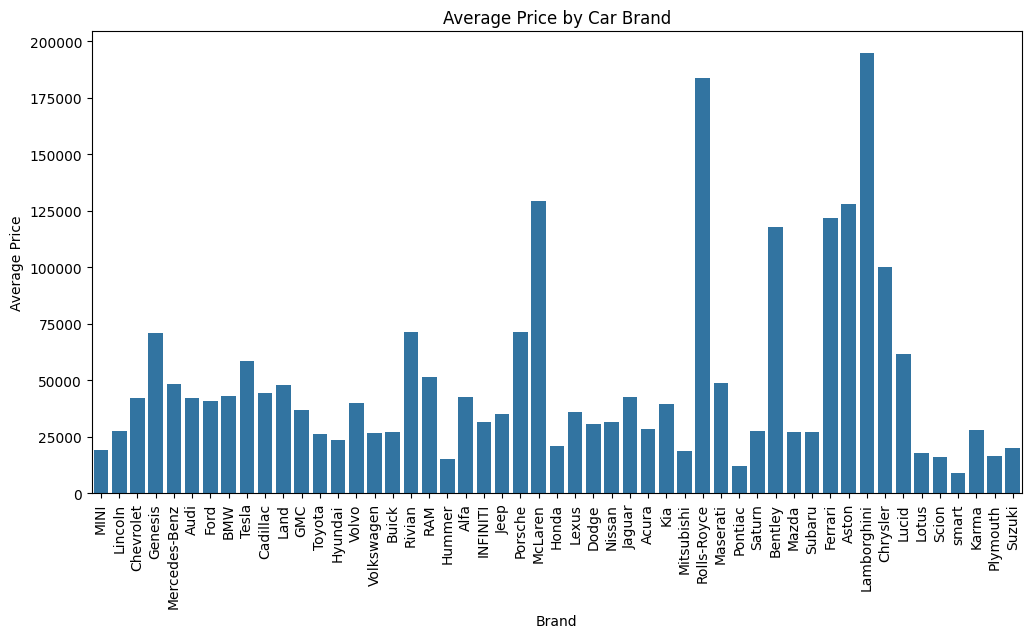

In [206]:
#creates a bar plot to visualize the average price of cars by brand.
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df_train[:10000], errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

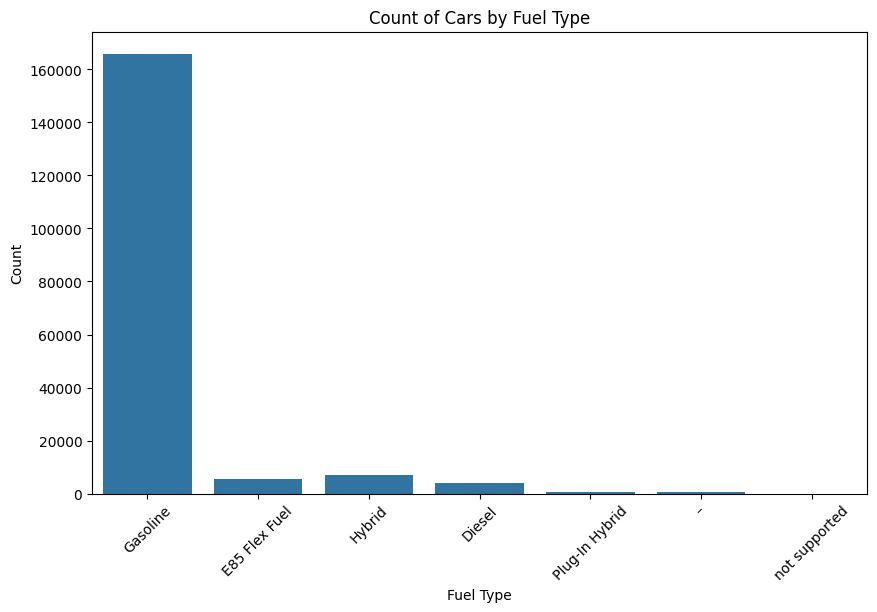

In [207]:
#plot shows the count of cars for each fuel type in the training dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df_train)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

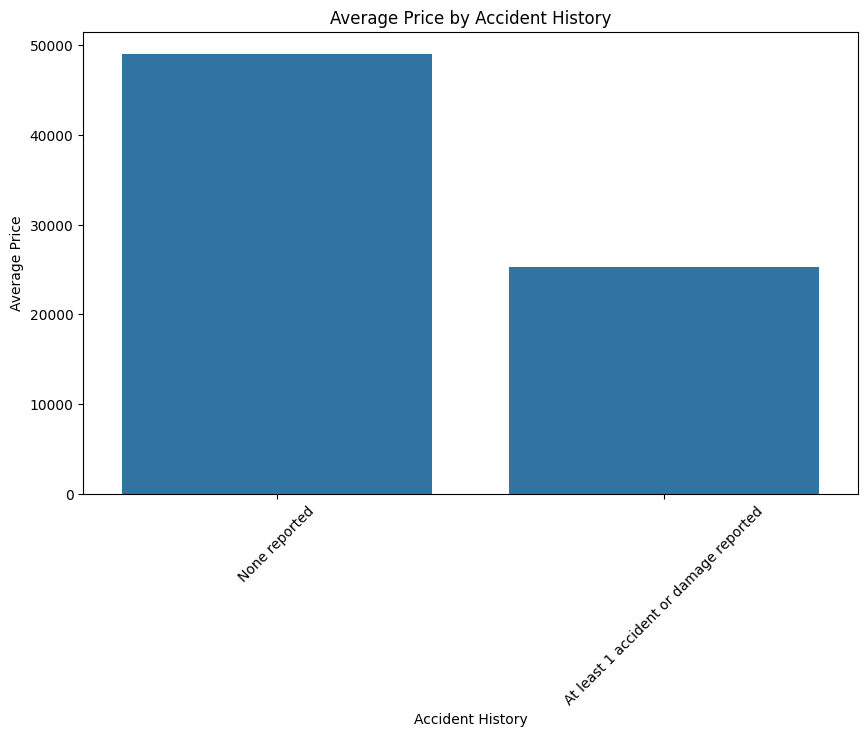

In [208]:
#plot displays the average price of cars categorized by accident history
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=df_train, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [209]:
#Checking for missing values in the training dataset
df_train.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0
accident,2452


In [210]:
df_test.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0
accident,1632


In [211]:
# Installing the category_encoders library for categorical encoding
!pip install category_encoders

In [212]:
# Installing the dython library for data analysis and correlation visualization
!pip install dython

In [213]:
# Importing necessary libraries for data preprocessing and splitting
# Includes train_test_split, encoders for categorical data, and category_encoders for advanced encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import category_encoders as ce

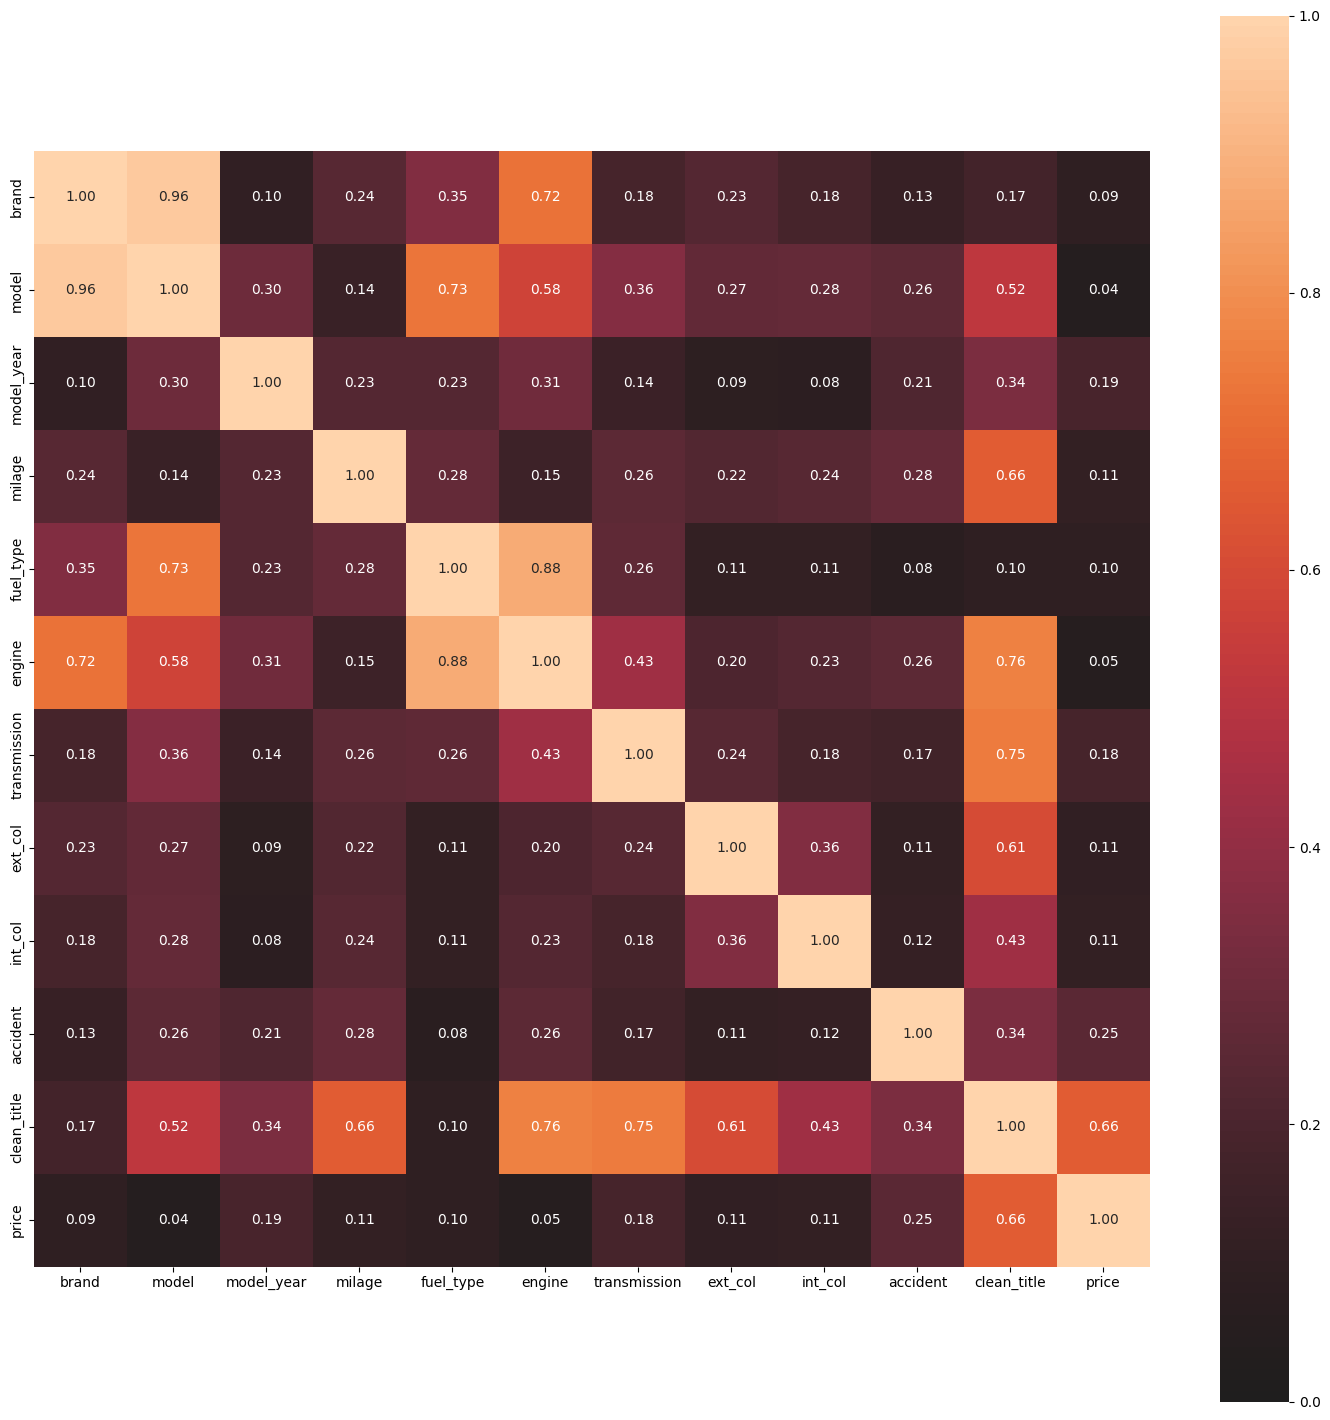

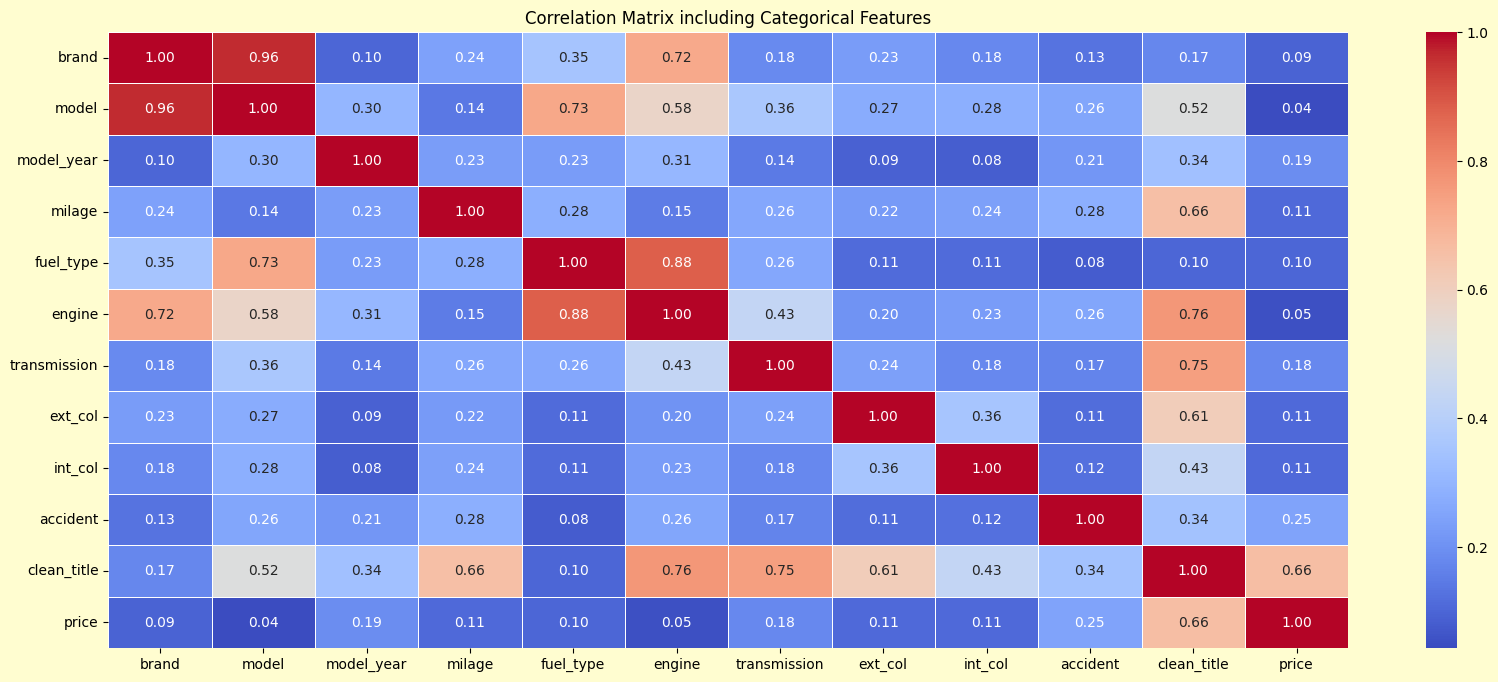

In [214]:
#correlations between features, including categorical variables
# Using dython's associations to compute the correlation matrix for mixed data types
from dython.nominal import associations

associations_df = associations(df_train, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [219]:
# Getting all the unique values for 'fuel_type'
df_train['fuel_type'].unique()

array(['Gasoline', 'Flex Fuel', 'none', 'Hybrid', 'Diesel',
       'Plug-In Hybrid'], dtype=object)

In [220]:
#invalid or missing values in the "fuel_type" column with a placeholder "none"
df_train["fuel_type"].replace({np.nan:"none",'–':'none','not supported':'none'}, inplace=True)
df_test["fuel_type"].replace({np.nan:"none",'–':'none','not supported':'none'}, inplace=True)

In [221]:
#E85 Flex Fuel" with "Flex Fuel" for consistency in both train and test datasets
df_train["fuel_type"] = df_train["fuel_type"].replace({"E85 Flex Fuel":"Flex Fuel"})
df_test["fuel_type"] = df_test["fuel_type"].replace({"E85 Flex Fuel":"Flex Fuel"})

In [222]:
df_train["fuel_type"][:10]

,fuel_type
0,Gasoline
1,Gasoline
2,Flex Fuel
3,Gasoline
4,Gasoline
5,Gasoline
6,Gasoline
7,Flex Fuel
8,Gasoline
9,Gasoline


In [223]:
df_train["accident"].value_counts()

,count
accident,
None reported,144514
At least 1 accident or damage reported,41567


In [224]:
df_train['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [225]:
# Filling missing values in the "accident" column with 'None reported'
df_train['accident'].fillna('None reported',inplace=True)
df_test['accident'].fillna('None reported',inplace=True)

In [226]:
df_train["clean_title"].unique()

array(['Yes', nan], dtype=object)

In [227]:
#Filling missing values in the "clean_title" column with 'No'
df_train['clean_title'].fillna('No',inplace=True)
df_test['clean_title'].fillna('No',inplace=True)

In [228]:
df_train["engine"].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [229]:
#Replacing invalid or missing values in the "engine" column with a placeholder "none"
df_train["engine"].replace({np.nan:"none",'–':'none',"...":'none'}, inplace=True)
df_test["engine"].replace({np.nan:"none",'–':'none',"...":'none'}, inplace=True)

In [230]:
df_train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [231]:
#Displaying the top 5 most frequent values for each column ,provides insight into the most common categories for each feature
col = ['brand','model','int_col','ext_col','model_year','fuel_type','transmission','engine','fuel_type','clean_title','accident']
for c in col:
    print(df_train[c].value_counts()[:5],end='\n\n')


brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Name: count, dtype: int64

model
F-150 XLT             2945
M3 Base               2229
Camaro 2SS            1709
M4 Base               1622
Mustang GT Premium    1526
Name: count, dtype: int64

int_col
Black    107674
Beige     24495
Gray      21204
Brown      5810
Red        5145
Name: count, dtype: int64

ext_col
Black     48658
White     43815
Gray      25293
Silver    16995
Blue      14555
Name: count, dtype: int64

model_year
2021    18198
2018    16414
2020    15848
2022    15749
2019    15409
Name: count, dtype: int64

fuel_type
Gasoline     165940
Hybrid         6832
none           5879
Flex Fuel      5406
Diesel         3955
Name: count, dtype: int64

transmission
A/T                               49904
8-Speed A/T                       20645
Transmission w/Dual Shift Mode    19255
6-Speed A/T                       18044
6-Speed M/T                       11

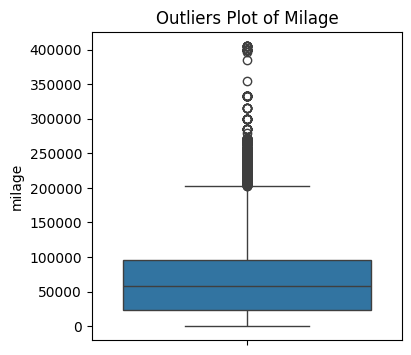

In [232]:
#distribution of "milage" with a boxplot to identify outliers
plt.figure(figsize=(4,4))
sns.boxplot(df_train["milage"])
plt.title("Outliers Plot of Milage")
plt.show()

In [233]:
# The function removes outliers using the Interquartile Range (IQR) method and calculates the percentage of outliers removed
def handling_milage_outliers(df, feature):
    ''' calculate percent of outliers and remove them'''
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    df_cleaned = df[(df[feature] >= lower) & (df[feature] <= upper)]

    percent_outlier = round( (1-(len(df_cleaned)/len(df))) * 100, 2)
    print('Percentage of outliers:',percent_outlier)

    return df_cleaned


train_cleaned = handling_milage_outliers(df_train, 'milage')

Percentage of outliers: 0.94


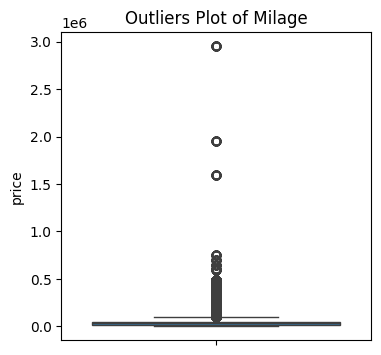

In [234]:
#distribution of "price" with a boxplot to identify outliers
plt.figure(figsize=(4,4))
sns.boxplot(df_train["price"])
plt.title("Outliers Plot of Milage")
plt.show()

In [235]:
# a function for imputing missing values
# function first encodes categorical columns, then applies KNN to impute missing values, and finally decodes the categorical columns back to their original values
from sklearn.impute import KNNImputer

def knn_impute(df, n_neighbors=5):
    # Creating a copy of the dataframe to avoid modifying the original
    df_encoded = df.copy()

    # Encoding categorical columns as numeric values to apply KNN
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

    # Applying KNN imputation
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)

    # Decoding the categorical columns back to their original values
    for col in df.select_dtypes(include='object').columns:
        df_imputed[col] = df_imputed[col].round().astype(int).map(
            dict(enumerate(df[col].astype('category').cat.categories)))

    return df_imputed


In [236]:
# - n_neighbors=25: Specifies the number of nearest neighbors considered for imputation
df_train_imputed = knn_impute(df_train, n_neighbors=25)
df_test_imputed = knn_impute(df_test, n_neighbors=25)

In [237]:
# Step 1: Identify categorical columns, excluding the target column ('class').
cat_cols_train = df_train_imputed.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']

# Step 2: Initialize OrdinalEncoder with handling for unknown categories.
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Step 3: Apply ordinal encoding to categorical columns in the training and test datasets.
df_train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(df_train_imputed[cat_cols_train].astype(str))
df_test_imputed[cat_cols_train] = ordinal_encoder.transform(df_test_imputed[cat_cols_train].astype(str))

In [238]:
df_train_imputed.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,31.0,495.0,2007.0,213000.0,2.0,116.0,38.0,312.0,71.0,1.0,1.0,4200.0
1,28.0,930.0,2002.0,143250.0,2.0,366.0,38.0,263.0,10.0,0.0,1.0,4999.0
2,9.0,1575.0,2002.0,136731.0,1.0,640.0,38.0,38.0,71.0,1.0,1.0,13900.0
3,16.0,758.0,2017.0,19500.0,2.0,863.0,49.0,29.0,14.0,1.0,1.0,45000.0
4,36.0,1077.0,2021.0,7388.0,2.0,259.0,23.0,29.0,10.0,1.0,1.0,97500.0


In [239]:
df_test_imputed.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,26.0,1390.0,2015.0,98000.0,2.0,325.0,16.0,304.0,10.0,1.0,1.0
1,26.0,1377.0,2020.0,9142.0,3.0,787.0,31.0,263.0,14.0,1.0,1.0
2,14.0,636.0,2022.0,28121.0,2.0,540.0,3.0,304.0,57.0,1.0,0.0
3,3.0,182.0,2016.0,61258.0,2.0,192.0,39.0,261.0,14.0,1.0,0.0
4,3.0,181.0,2018.0,59000.0,2.0,364.0,38.0,128.0,14.0,1.0,1.0


In [240]:
# Assigning the imputed datasets back to the original variables
df_train = df_train_imputed
df_test = df_test_imputed

In [241]:
# Splitting the training dataset into features (X) and target variable (y)
y = df_train['price']
X = df_train.drop(['price'],axis=1)

In [242]:
# - XGBRegressor: XGBoost regression model for high-performance gradient boosting.
# - LGBMRegressor: LightGBM regression model for efficient gradient boosting.
# - mean_squared_error: Metric to evaluate the performance of regression models by calculating the squared error.
# - KFold: Cross-validation technique to split data into training and validation sets multiple times.
# - train_test_split: Utility function to split datasets into training and testing subsets.
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [243]:
# Setting up K-Fold Cross-Validation and LightGBM parameters
# - n_splits: Number of folds for K-Fold cross-validation.
# - kf: KFold object to split the dataset into training and validation subsets.
# - lgb_params: Dictionary containing hyperparameters for the LightGBM regressor.

n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

lgb_params = {
    'num_leaves': 426,
    'max_depth': 20,
    'learning_rate': 0.011353178352988012,
    'n_estimators': 10000,
    'metric': 'rmse',
    'subsample': 0.5772552201954328,
    'colsample_bytree': 0.9164865430101521,
    'reg_alpha': 1.48699088003429e-06,
    'reg_lambda': 0.41539458543414265,
    'min_data_in_leaf': 73,
    'feature_fraction': 0.751673655170548,
    'bagging_fraction': 0.5120415391590843,
    'bagging_freq': 2,
    'random_state': 42,
    'min_child_weight': 0.017236362383443497,
    'cat_smooth': 54.81317407769262,
    'verbose': -1,
    'early_stopping_rounds': 200,
}

# Initializing arrays to store predictions and labels
# - lgbm_predictions: Stores validation predictions for each fold.
# - lgbm_true_labels: Stores true validation labels for each fold.
# - lgbm_test_predictions: Stores averaged predictions for the test dataset.

lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")

    # Splitting data into training and validation subsets for the current fold
    X_train, X_val = scaled_train_data[train_idx], scaled_train_data[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Initializing LightGBM Regressor with specified parameters
    lgbm_model = LGBMRegressor(**lgb_params)

    # Training the model with early stopping on the validation set
    lgbm_model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
    )

    # Generating predictions for validation and test sets
    lgbm_fold_preds = lgbm_model.predict(X_val)
    lgbm_fold_test_preds = lgbm_model.predict(scaled_test_data)

    # Storing predictions and true labels for the current fold
    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val

    # Averaging test predictions across folds
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits

    # Calculating and displaying RMSE for the current fold
    fold_rmse = np.sqrt(mean_squared_error(y_val, lgbm_fold_preds))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")

# Calculating overall RMSE across all folds
overall_rmse_lgbm = np.sqrt(mean_squared_error(lgbm_true_labels, lgbm_predictions))
print(f"Overall RMSE (LGBMRegressor): {overall_rmse_lgbm:.4f}")


Training fold 1/3...
Fold 1 RMSE: 66542.6477
Training fold 2/3...
Fold 2 RMSE: 75208.9508
Training fold 3/3...
Fold 3 RMSE: 76071.8618
Overall RMSE (LGBMRegressor): 72735.1925


In [244]:
# XGBoost model training and evaluation with K-Fold Cross-Validation
# - xgb_params: Hyperparameters for the XGBoost model.
# - KFold: Used for cross-validation to split the data into training and validation subsets.
# - xgb_predictions: Stores predictions for validation sets across all folds.
# - xgb_true_labels: Stores true labels for validation sets across all folds.
# - xgb_test_predictions: Stores averaged predictions for the test set across all folds.

xgb_params = {
    'lambda': 0.03880258557285165,
    'alpha': 0.02129832295514386,
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'learning_rate': 0.014,
    'max_depth': 17,
    'random_state': 2020,
    'min_child_weight': 85,
    'n_estimators': 10000,
    'early_stopping_rounds': 200,
    'eval_metric': 'rmse',
}

n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initializing arrays for storing predictions
xgb_predictions = np.zeros(len(scaled_train_data))
xgb_true_labels = np.zeros(len(scaled_train_data))
xgb_test_predictions = np.zeros(len(scaled_test_data))

# K-Fold Cross-Validation Loop
for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")

    # Splitting data into training and validation subsets for the current fold
    X_train, X_val = scaled_train_data[train_idx], scaled_train_data[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Initializing the XGBoost Regressor with specified parameters
    xgb_model = XGBRegressor(**xgb_params)

    # Training the model with early stopping on the validation set
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False  # Suppress verbose output
    )

    # Generating predictions for validation and test sets
    xgb_fold_preds = xgb_model.predict(X_val)
    xgb_fold_test_preds = xgb_model.predict(scaled_test_data)

    # Storing predictions and true labels for the current fold
    xgb_predictions[val_idx] = xgb_fold_preds
    xgb_true_labels[val_idx] = y_val

    # Averaging test predictions across folds
    xgb_test_predictions += xgb_fold_test_preds / n_splits

    # Calculating and displaying RMSE for the current fold
    fold_rmse = np.sqrt(mean_squared_error(y_val, xgb_fold_preds))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")

# Calculating overall RMSE across all folds
overall_rmse_xgb = np.sqrt(mean_squared_error(xgb_true_labels, xgb_predictions))
print(f"Overall RMSE (XGBRegressor): {overall_rmse_xgb:.4f}")


Training fold 1/3...
Fold 1 RMSE: 66496.3117
Training fold 2/3...
Fold 2 RMSE: 75197.3734
Training fold 3/3...
Fold 3 RMSE: 75976.0171
Overall RMSE (XGBRegressor): 72683.6660


In [245]:
lgbm_test_predictions

array([18482.26646538, 81681.31586995, 63932.11132284, ...,
       22255.8670706 , 15552.80789228, 35316.38260453])

In [246]:
xgb_test_predictions

array([17149.40332031, 79637.37109375, 59584.16601562, ...,
       21079.19335938, 17802.28027344, 35441.34765625])

In [247]:
df_submission = pd.read_csv('sample_submission.csv')

In [248]:
df_submission.head()

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016


In [249]:
# Create an ensemble prediction by combining LightGBM and XGBoost predictions with weighted averaging (66% LightGBM, 34% XGBoost).
df_submission['price']= lgbm_test_predictions*0.66+xgb_test_predictions*0.34

In [250]:
# Save the df_submission DataFrame to 'pricesResult.csv' without including the index
df_submission.to_csv('pricesResult.csv', index = False)
pd.read_csv('pricesResult.csv')

,id,price
0,188533,18029.092996
1,188534,80986.374646
2,188535,62453.809918
3,188536,25071.381822
4,188537,29243.843588
...,...,...
125685,314218,28919.942938
125686,314219,46885.974301
125687,314220,21855.798009
125688,314221,16317.628502
